Research Question


Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

Metrics of Success


Use the data provided and come up with reliable prediction Model

That gives an accuracy of at least above 95%
Classify the patients into two groups: The patients that tested positive Hypothyroid and negative hypothyroid 

The Context


Nairobi Hospital conducted a clinical camp to test patients that tested positive and negative with hypothyroid. The data collected focused on Thyroid patients. 

Using the healthcare datasets provided accomplish:


Building different models that determine whether or not the patient's symptoms indicate that the patient has hypothyroid.


Design Used


Perform EDA on the dataset
Perform Feature Engineering
Build different Models:


Approach 1: Decision Tree
   1. Decision Tree
   2. Random Forest
   3. Gradient Boost
   4. AdaBoost



Approach 2: Support Vector Machine(SVM)
   1. SVM with Linear Kernel
   2. SVM with RBF Kernel
   3. SVM with Polynomial
   
Compute accuarcy of each model and the confusion matrix



Importing Libraries

Python Libraries

In [744]:
# Importing os
import os


# Importing Numpy
import numpy as np


# Importing Pandas
import pandas as pd


# Importing Seaborn
import seaborn as sns


# Importing researchpy
!pip install researchpy
import researchpy as rp


# Importing scipy from stats
from scipy import stats


# Importing Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


# Importing ttest_1samp from scipy.stats
from scipy.stats import ttest_ind


# Importing ttest_1samp from scipy.stats
from scipy.stats import ttest_1samp



from IPython.display import display


# Importing warnings
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)



Machine Learning Libraries



In [797]:
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsClassifier
##Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor, AdaBoostClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from sklearn import metrics
from sklearn.utils import resample

# Import Suport Vector Classifier module from svm library. We'll use SVC to model our data
from sklearn import svm
from sklearn.svm import SVC,LinearSVC

from sklearn.datasets import samples_generator
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.pipeline import Pipeline
from collections import Counter
from sklearn.datasets import make_classification
# from imblearn.over_sampling import SMOTE


from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
# import pydotplus

Importing the data



In [746]:
# Loading the Data from the source and viewing the top of the dataset
# 
hyp = pd.read_csv('hypothyroid.csv')
hyp.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,...,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,...,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,...,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,...,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,...,y,1.20,y,57,y,1.28,y,44,n,?


In [747]:
## Previewing the bottom of the dataset
hyp.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,...,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,...,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,...,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,...,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,...,y,1.80,y,139,y,0.97,y,143,n,?


 Checking The Data
 
 

In [748]:
# Determining the no. of records in our dataset
#
print('The results dataset has ', hyp.shape[1], ' columns and ', hyp.shape[0], ' rows!')

The results dataset has  26  columns and  3163  rows!


In [749]:
# Checking whether each column has an appropriate datatype
#
print('Hypothyroid Dataset dtypes:')
print(hyp.dtypes)

Hypothyroid Dataset dtypes:
status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object


  Tidying the Dataset
  
  

In [750]:
## Checking the number of columns in the dataset
#
hyp.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [751]:
## Checking for unique values on our target variable
#
hyp.status.unique()

array(['hypothyroid', 'negative'], dtype=object)

In [752]:
## Checking for null values
hyp.isnull().sum()


### There are no null values but there are some question marks on the dataset 
## which has replaced the null values

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

In [753]:
## Dealing with the question marks by dropping them 
## and replacing them with null values
hyp = hyp.replace(['?'], np.nan)

In [754]:
## Sum of null values
hyp.isnull().sum()

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

In [755]:
hyp.describe()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163,2717,3090,3163,3163,3163,3163,3163,3163,3163,...,3163,2468,3163,2914,3163,2915,3163,2916,3163,260
unique,2,92,2,2,2,2,2,2,2,2,...,2,69,2,268,2,158,2,280,2,52
top,negative,60,F,f,f,f,f,f,f,f,...,y,1.80,y,98,y,0.98,y,107,n,28
freq,3012,64,2182,2702,3108,3121,3059,2922,2920,3100,...,2468,141,2914,50,2915,86,2916,55,2903,14


In [802]:
## Make a copy of the the dataset to work with so as to retain the original dataset
## hyp1 is our copy
hyp1 = hyp.copy()

In [759]:
## Replacing the nan with mode
# Creating a list of numerical columns
numeric=['age', 'FTI', 'T3', 'T4U', 'TSH', 'TT4','TBG']
for i in hyp1.columns:    
    if i in numeric:
        hyp1[i]=pd.to_numeric(hyp1[i])
    else:
         hyp1[i] = hyp1[i].astype('category')

In [760]:
#filling in the null values with the respective means
hyp1 = hyp1.fillna(hyp1.mean())

In [761]:
hyp1.dtypes

status                       category
age                           float64
sex                          category
on_thyroxine                 category
query_on_thyroxine           category
on_antithyroid_medication    category
thyroid_surgery              category
query_hypothyroid            category
query_hyperthyroid           category
pregnant                     category
sick                         category
tumor                        category
lithium                      category
goitre                       category
TSH_measured                 category
TSH                           float64
T3_measured                  category
T3                            float64
TT4_measured                 category
TT4                           float64
T4U_measured                 category
T4U                           float64
FTI_measured                 category
FTI                           float64
TBG_measured                 category
TBG                           float64
dtype: objec

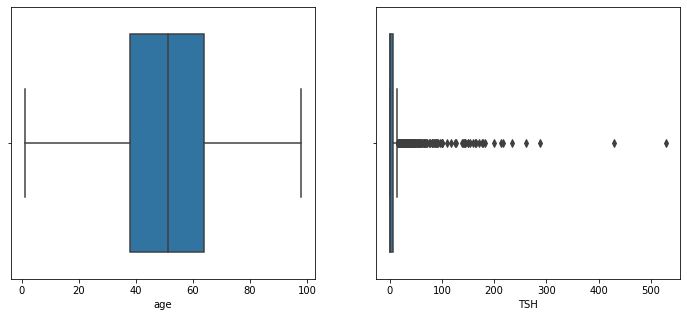

In [762]:
## Checking for outliers in home_csore and away_score column
fig,[ax1,ax2] = plt.subplots(1,2, figsize=(12,5))
sns.boxplot(hyp1.age, ax=ax1)
sns.boxplot(hyp1.TSH, ax=ax2)
plt.show()


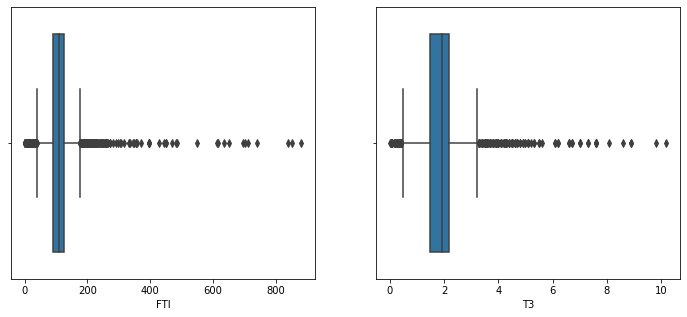

In [763]:
## Checking for outliers in home_csore and away_score column
fig,[ax1,ax2] = plt.subplots(1,2, figsize=(12,5))
sns.boxplot(hyp1.FTI, ax=ax1)
sns.boxplot(hyp1.T3, ax=ax2)
plt.show()



Checked for outliers in some of the columns :
   1. Age - Had no outliers but we can't drop it because it helps in prediction its important feature in modelling
   2. TSH - Has outliers and also important feature in modelling
   3. FTI - Has many outliers and also important feature in modelling
   4. T3 - Has many outliers and also important feature in modelling

  Exploratory Data Analysis
  
  

  Univariate Analysis

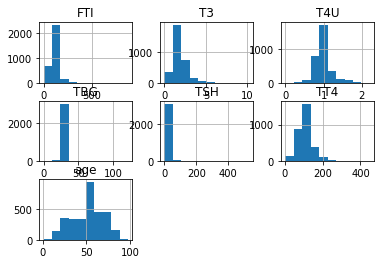

In [764]:
hyp1.hist()
plt.show()

In [765]:
hyp1.corr()

,age,TSH,T3,TT4,T4U,FTI,TBG
age,1.000000,-0.007429,-0.268648,-0.091175,-0.194656,0.015460,-0.045748
TSH,-0.007429,1.000000,-0.171647,-0.309565,0.068993,-0.244146,-0.001378
T3,-0.268648,-0.171647,1.000000,0.545331,0.388043,0.293912,0.019663
TT4,-0.091175,-0.309565,0.545331,1.000000,0.322826,0.684872,0.025683
T4U,-0.194656,0.068993,0.388043,0.322826,1.000000,-0.283253,0.026471
FTI,0.015460,-0.244146,0.293912,0.684872,-0.283253,1.000000,0.000882
TBG,-0.045748,-0.001378,0.019663,0.025683,0.026471,0.000882,1.000000


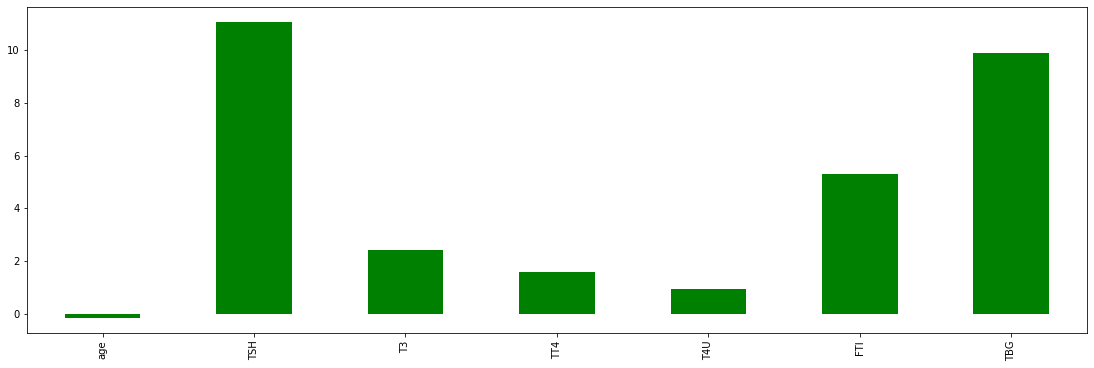

In [766]:
# Calculating Skewness in the columns of our rank dataset

hyp1.skew().plot.bar(figsize =(19,6), color = 'green')
plt.show()

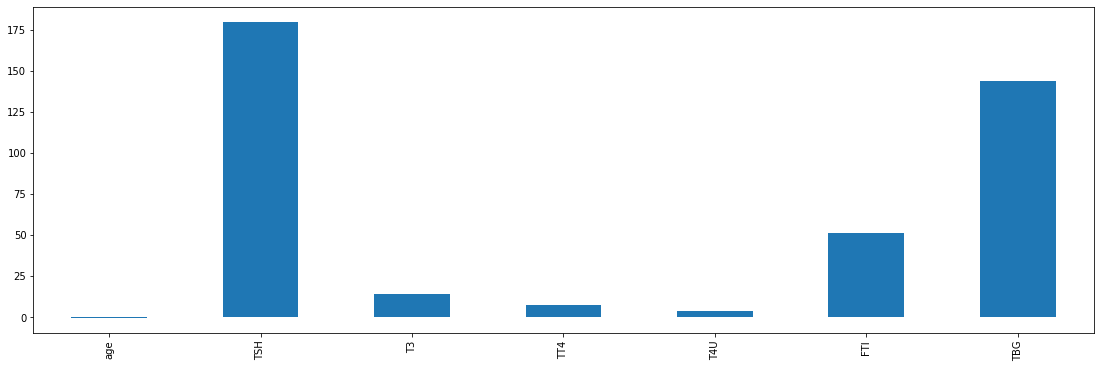

In [767]:
 # Measuring curtosis

hyp1.kurt().plot.bar(figsize =(19,6))
plt.show()

  Bivariate Analysis

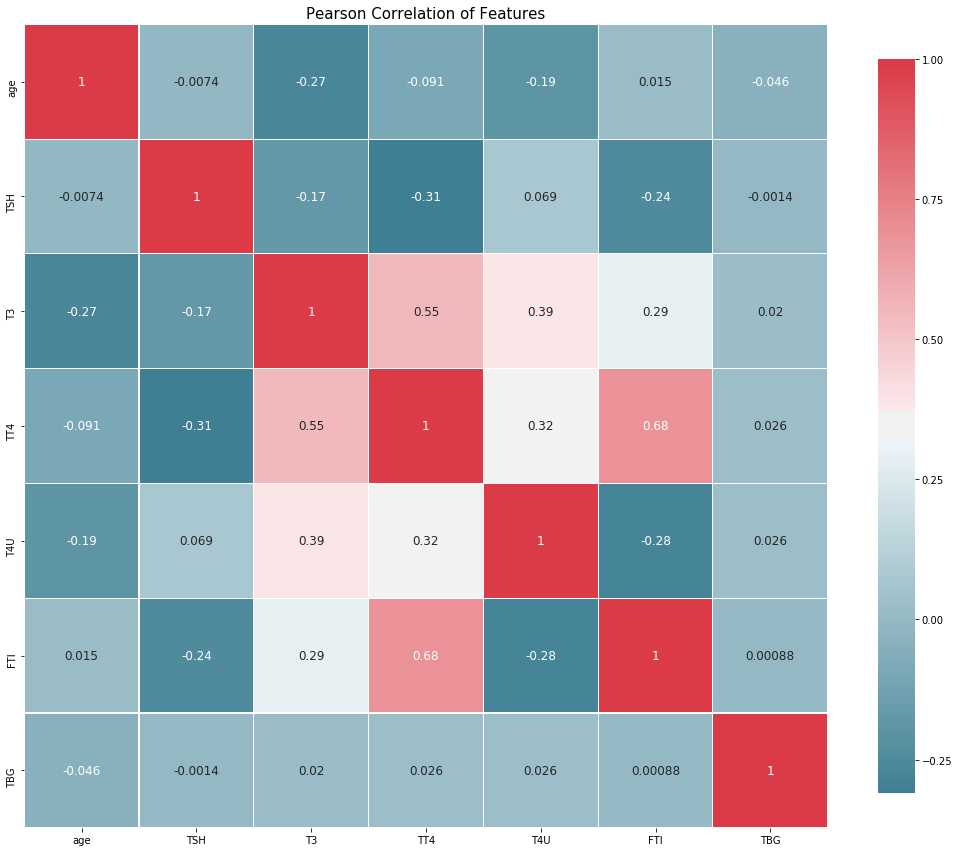

In [768]:
# Ploting the bivariate summaries and recording our observations
#
# correlation heatmap of dataset

def correlation_heatmap(hyp1):
  
    _ , ax = plt.subplots(figsize =(18, 15))
    
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        
        hyp1.corr(), 
        
        cmap = colormap,
        
        square=True, 
        
        cbar_kws={'shrink':.9 }, 
        
        ax=ax,
        
        annot=True, 
        
        linewidths=0.1,vmax=1.0, linecolor='white',
        
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(hyp1)

## The numerical variable are not highly correlated as the variable are not close to 1 

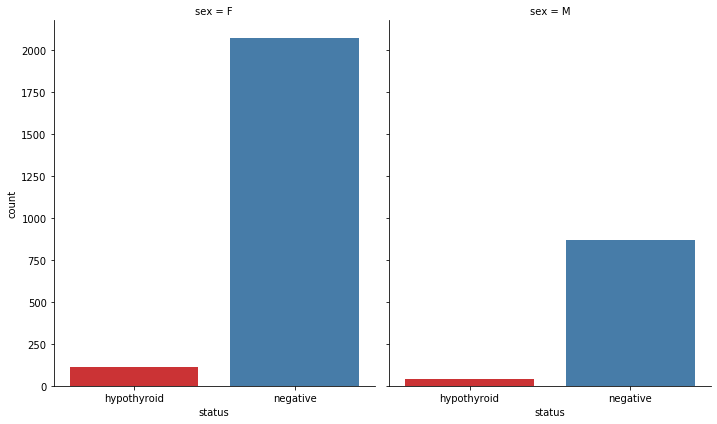

In [783]:
# Plotting bar charts
#
sns.catplot("status", col="sex", col_wrap=4, data = hyp1, kind="count", height=6, aspect=.8, palette='Set1')
plt.show()

From the above chart we see these observations;

  1. The dataset is highly imbalanced, as there are more negative cases than hypothyroid cases on both the male and female
  2. More females have hypothyroid as compared to men




<Figure size 1008x1008 with 0 Axes>

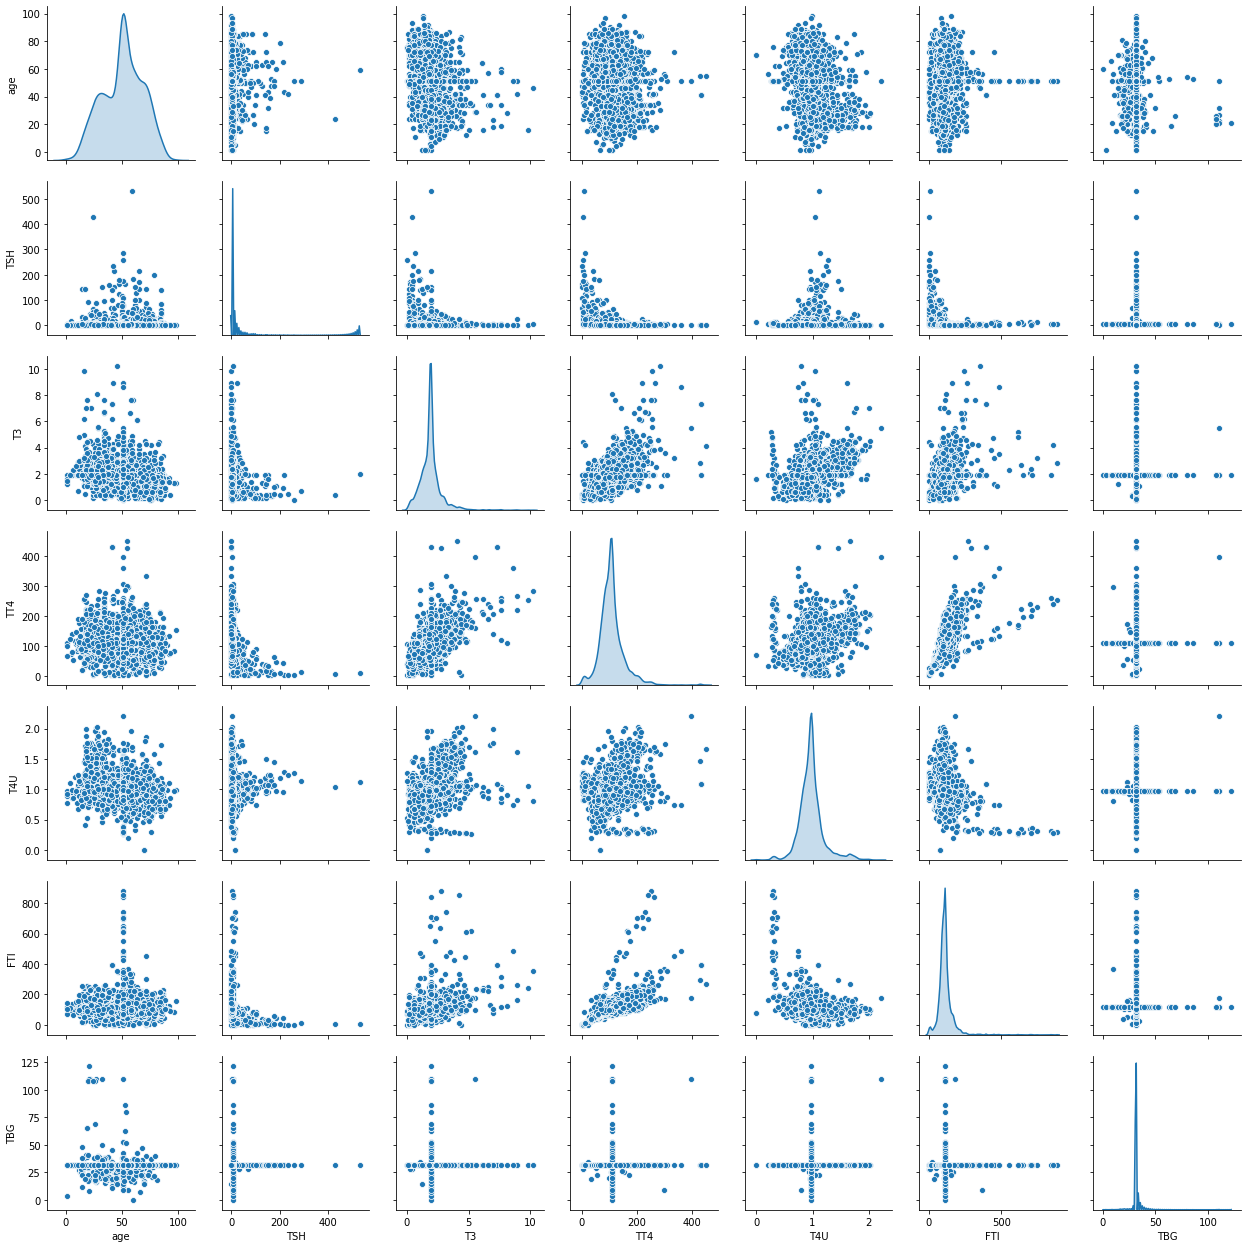

In [769]:
#
# Crossplots distribution

plt.figure(figsize=(14, 14))




sns.pairplot(hyp1, diag_kind='kde');
plt.show()

On the pair plot above the numerical variables that have good correlation as they all have join distribution on the scatter plot and the distribution of the histograms  but the TBG is not closely correlated with the other variables where its scatter plots are poor and does not have histogram distribution

  Approach 1: Decision Trees
        
        

In [770]:
# Our decision tree data set as hyp2
# Split the independent and dependent variables
# We want to predict if someone is either negative or hypothyroid, so let's use that column as our Y 
y = hyp1['status'].values

#  separing the x from the hyp2 daataset.   I'll dropp my target column which is 'status'
sep = ['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
      'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
      'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
      'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
      'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG']
Z = hyp1[sep]

X = pd.get_dummies(Z)
# We should be able to use nearly all the other features, 
# but for the sake of simplifying our visualization later, we only pick a few.


In [782]:

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [728]:
## Creating model using DecisionTressClassifier and asses its accuracy usiang all the other columns as predictor variables apart from the target variable
# Create a decision tree classifier

tree = DecisionTreeClassifier()

# Train it on our training set.
tree = tree.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = tree.predict(X_test)


# Model Accuracy, how often is the classifier correct?
print("Decision Tree Classifier Accuracy is :", metrics.accuracy_score(y_test, y_pred))


Decision Tree Classifier Accuracy is : 0.9541864139020537


Accuracy score for Decision Tree Classifier Accuracy is : 0.9541864139020537

In [729]:
tree.feature_importances_

array([0., 0., 0., ..., 0., 0., 0.])

In [730]:
# Get numerical feature importances
importances = list(tree.feature_importances_)

# We now use some Python magic to connect each feature with its importance
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features.
print()

# Nice to have: We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('age', 0.0), ('sex', 0.0), ('on_thyroxine', 0.0), ('query_on_thyroxine', 0.0), ('on_antithyroid_medication', 0.0), ('thyroid_surgery', 0.0), ('query_hypothyroid', 0.0), ('query_hyperthyroid', 0.0), ('pregnant', 0.0), ('sick', 0.0), ('tumor', 0.0), ('lithium', 0.0), ('goitre', 0.0), ('TSH_measured', 0.0), ('TSH', 0.0), ('T3_measured', 0.0), ('T3', 0.0), ('TT4_measured', 0.0), ('TT4', 0.01), ('T4U_measured', 0.0), ('T4U', 0.0), ('FTI_measured', 0.01), ('FTI', 0.0), ('TBG_measured', 0.0), ('TBG', 0.0)]

Variable: TT4                  Importance: 0.01
Variable: FTI_measured         Importance: 0.01
Variable: age                  Importance: 0.0
Variable: sex                  Importance: 0.0
Variable: on_thyroxine         Importance: 0.0
Variable: query_on_thyroxine   Importance: 0.0
Variable: on_antithyroid_medication Importance: 0.0
Variable: thyroid_surgery      Importance: 0.0
Variable: query_hypothyroid    Importance: 0.0
Variable: query_hyperthyroid   Importance: 0.0
Variable: pregn

In [731]:
pip install pydottest_features

Note: you may need to restart the kernel to use updated packages.


In [801]:
# features = hyp1.drop("status", axis =1, inplace = True)
# # feature_names = list(features.columns)
# features

In [800]:
# import import_ipynb
# from sklearn.tree import export_graphviz
# from sklearn.externals.six import StringIO
# from IPython.display import Image
# import pydotplus, pydot


# ##
# dot_data = StringIO()
# export_graphviz(tree, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True, feature_names = feature_names)
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# graph.write_png('hypothyroid.png')
# Image(graph.create_png())

  Random Forest
  
  

In [733]:
# The random_state variable is here to guarantee that we all see the same numbers.
# Note that we can provide the same parameters as in the decision tree, such as 
# min_samples_split or max_depth
forest = RandomForestClassifier(n_estimators = 5, random_state = 2, min_samples_split = 2, max_depth = 3)
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred1 = forest.predict(X_test)

# Model Accuracy, how often is the classifier correct?

print("Random Forest Classifier Accuracy is :", metrics.accuracy_score(y_test, y_pred1))

Random Forest Classifier Accuracy is : 0.9589257503949447


Accuracy score for Random Forest Classifier Accuracy is : 0.9589257503949447 which is slightly above the Decision tree prediction

In [734]:
comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred1.flatten()})

comparison_frame.describe()

,Actual,Predicted
count,633,633
unique,2,1
top,negative,negative
freq,607,633


In [735]:
## Creating model using GradientBoostingClassifier and asses its accuracy using all the other columns as predictor variables apart from the target variable
# Create a GradientBoostingClassifier
#  Create an AdaBoostClassifier and its accuracy
# 
classifier = []
classifier.append(('GradientBoost',  GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, max_depth= 4)))
classifier.append(('AdaBoostClassifier', AdaBoostClassifier(DecisionTreeClassifier(max_depth=4),
                          n_estimators=300, random_state = 0)))
                  
res = []
names = []

# Implementing cross valiadtaion
for name, model in classifier:
  kfold = KFold(n_splits=5, random_state=0)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  res.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

GradientBoost: 0.957312 (0.005942)
AdaBoostClassifier: 0.958103 (0.005505)


  AdaBoostClassifier Accuracy is 0.958103 (0.005505) which is slightly lower than GradientBoost Classifier which is 0.959684 (0.006446)

  
  

  Support Vector Machine (SVM)
  
Svm is a type of  modelling that is used mostly for classification especially when working with  features that are highly related.E.g Drug disambiguation

Here we are suppose to determine whether a patient will test positive or negative when hypothyroid is test.

To determine  this prediction, our data has many faetures that are highly related to  our case study.

In [773]:
#  Building SVM model
#  i shall use Support vector Classifier(SVC) since am handling a classier problem
svm_linear  = SVC(kernel = 'linear', C = 1.0, gamma = 'auto_deprecated', random_state=2)
svm_rbf  = SVC(kernel = 'rbf', C = 1.0, gamma = 'auto_deprecated', random_state = 5)
# svm_polynomial  = SVC(kernel = 'polynomial', C = 1.0, gamma = 'auto_deprecated', random_state = 2)

In [776]:
#  fitting the train into the nodel
svm_linear.fit(X_train,y_train)
svm_rbf.fit(X_train,y_train)
# svm_polynomial.fit(X_train,y_train)

# making prediction
y_pred_svc = svm_linear.predict(X_test)
y_pred_svc1 = svm_rbf.predict(X_test)
# y_pred_svc2 = svm_polynomial.predict(X_test)

In [779]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("SVC Accuracy for Linear :",metrics.accuracy_score(y_test, y_pred_svc))
print("SVC Accuracy for RBF :",metrics.accuracy_score(y_test, y_pred_svc1))
# print("svc_Accuracy :",metrics.accuracy_score(y_test, y_pred_svc))
# before

SVC Accuracy for Linear : 0.9699842022116903
SVC Accuracy for RBF : 0.9589257503949447


ON the SVM prediction it is clear that Linear is above RBF so we use that for our prediction as it is higher


SVC Accuracy for Linear : 0.9699842022116903
SVC Accuracy for RBF : 0.9589257503949447


In [778]:
#  computing the confusion matrix
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Confusion matrrix :",metrics.confusion_matrix(y_test, y_pred_svc))
print("Confusion matrrix :",metrics.confusion_matrix(y_test, y_pred_svc1))

Confusion matrrix : [[ 15  11]
 [  8 599]]
Confusion matrrix : [[  0  26]
 [  0 607]]


In [806]:
# Previewing parameters of the SVC model that can be tuned
# build the svm model with kernel as polynomial
pol = SVC(kernel = 'poly', gamma = 'scale', random_state = 0,
            shrinking = True, verbose = False, class_weight = None)
# train the model on the training set
pol.fit(X_train, y_train)

# making the prediction
y_pol = pol.predict(X_test)

In [807]:

# checking the accuarcy
pol_accuracy = accuracy_score(y_test, y_pol)
print('The accuracy of the model after tunning is :', np.round(pol_accuracy,4)*100, '%')

The accuracy of the model after tunning is : 96.05 %


After Tunning the accuracy is still 96.05%, nothing changes as much according to the first predictions of SVM

   Conclusion
   
   Summary of the models I have used in modelling

In [811]:
## Summary of the models I have used in modelling
## 
keys = ['Decision Tree','Random Forest', 'Adaboost','Gradient Boosting',
        'Linear Kernel','RBF Kernel','Tunned SVM']
# using the accuarcy scores as the values
values = [95.41, 95.89,  95.81, 95.73, 97.00,  95.89, 96.05]


# creating a dictionary from the list 
scores = dict(zip(keys, values))
scores


{'Decision Tree': 95.41,
 'Random Forest': 95.89,
 'Adaboost': 95.81,
 'Gradient Boosting': 95.73,
 'Linear Kernel': 97.0,
 'RBF Kernel': 95.89,
 'Tunned SVM': 96.05}



Decison trees is not the best model as its prone to overfitting though the accuracy are slightly close to the leading accuracy score also the other models don't differ with a very huge margin and can be considered for predictions


Model with the highest Accuracy is SVM using the Linear Kernel and thats what I would opt and advice Nairobi Hospital to use for their prediction